In [1]:
# %matplotlib inline
%matplotlib widget

import obspy
import obspy.signal.trigger as trigger
import matplotlib.pyplot as plt
import numpy as np
from hydrophone_data_processing import load, preprocessing, tempmatch, useful_variables, plotting
from matplotlib.dates import num2date


# my first notebook!

yay here you go

In [2]:
# first arrival hydrophone ID : event number : time
# h3 : 420  : 2019-05-21T07:44:43.613000Z
# h3 : 365  : 2019-05-21T07:44:06.043000Z
# h3 : 75   : 2019-05-21T07:38:59.981000Z
# h4 : 750  : 2019-05-21T07:51:53.199000Z
# h5 : 1250 : 2019-05-21T08:13:02.569000Z
# h4 : 1552 : 2019-05-21T08:20:35.557000Z
# h5 : 2001 : 2019-05-21T08:31:18.593000Z
# h6 : 2300 : 2019-05-21T08:36:56.497000Z

In [3]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
data = load.get_raw_stream(paths=paths)
data.filter(type='highpass', freq=50, corners=1, zerophase=False)

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T00:00:04.958000Z - 2019-05-22T00:00:04.625000Z | 1000.0 Hz, 86399668 samples
7F.A00.02.GDH | 2019-05-21T00:00:02.689000Z - 2019-05-22T00:00:03.978000Z | 1000.0 Hz, 86401290 samples
7F.A00.03.GDH | 2019-05-21T00:00:00.991000Z - 2019-05-22T00:00:00.009000Z | 1000.0 Hz, 86399019 samples
7F.A00.04.GDH | 2019-05-21T00:00:00.295000Z - 2019-05-22T00:00:03.398000Z | 1000.0 Hz, 86403104 samples
7F.A00.05.GDH | 2019-05-21T00:00:00.964000Z - 2019-05-22T00:00:01.155000Z | 1000.0 Hz, 86400192 samples
7F.A00.06.GDH | 2019-05-21T00:00:01.824000Z - 2019-05-22T00:00:02.773000Z | 1000.0 Hz, 86400950 samples

In [20]:
def aic_pick(event):
    """
    Uses obspy aic_simple to pick the start time of an event
    
    Parameters
    --------------------
    event : obspy.Stream
        an obspy stream with traces inside. the expected data
        will be only for a single event, not the whole data set
        
    Returns
    --------------------
    aic_t : list
        the times per hydrophone for each aic picked event
    aics : list
        the raw aics calculated for each event
    """
    
    # calculates aic score
    aics = [trigger.aic_simple(tr.data) for tr in event]
    
    # finds minimum and returns index for aic scores
    aic_t_idx = [aic.argmin() for aic in aics]
    
    # uses minimum index to retrieve the timestamp
    aic_t = [event[n].times('matplotlib')[i] for n, i in enumerate(aic_t_idx)]
    
    return aic_t, aics

In [21]:
event1.count()

6

arrival depth A: 15.0
estimated depth (meters): 185.0


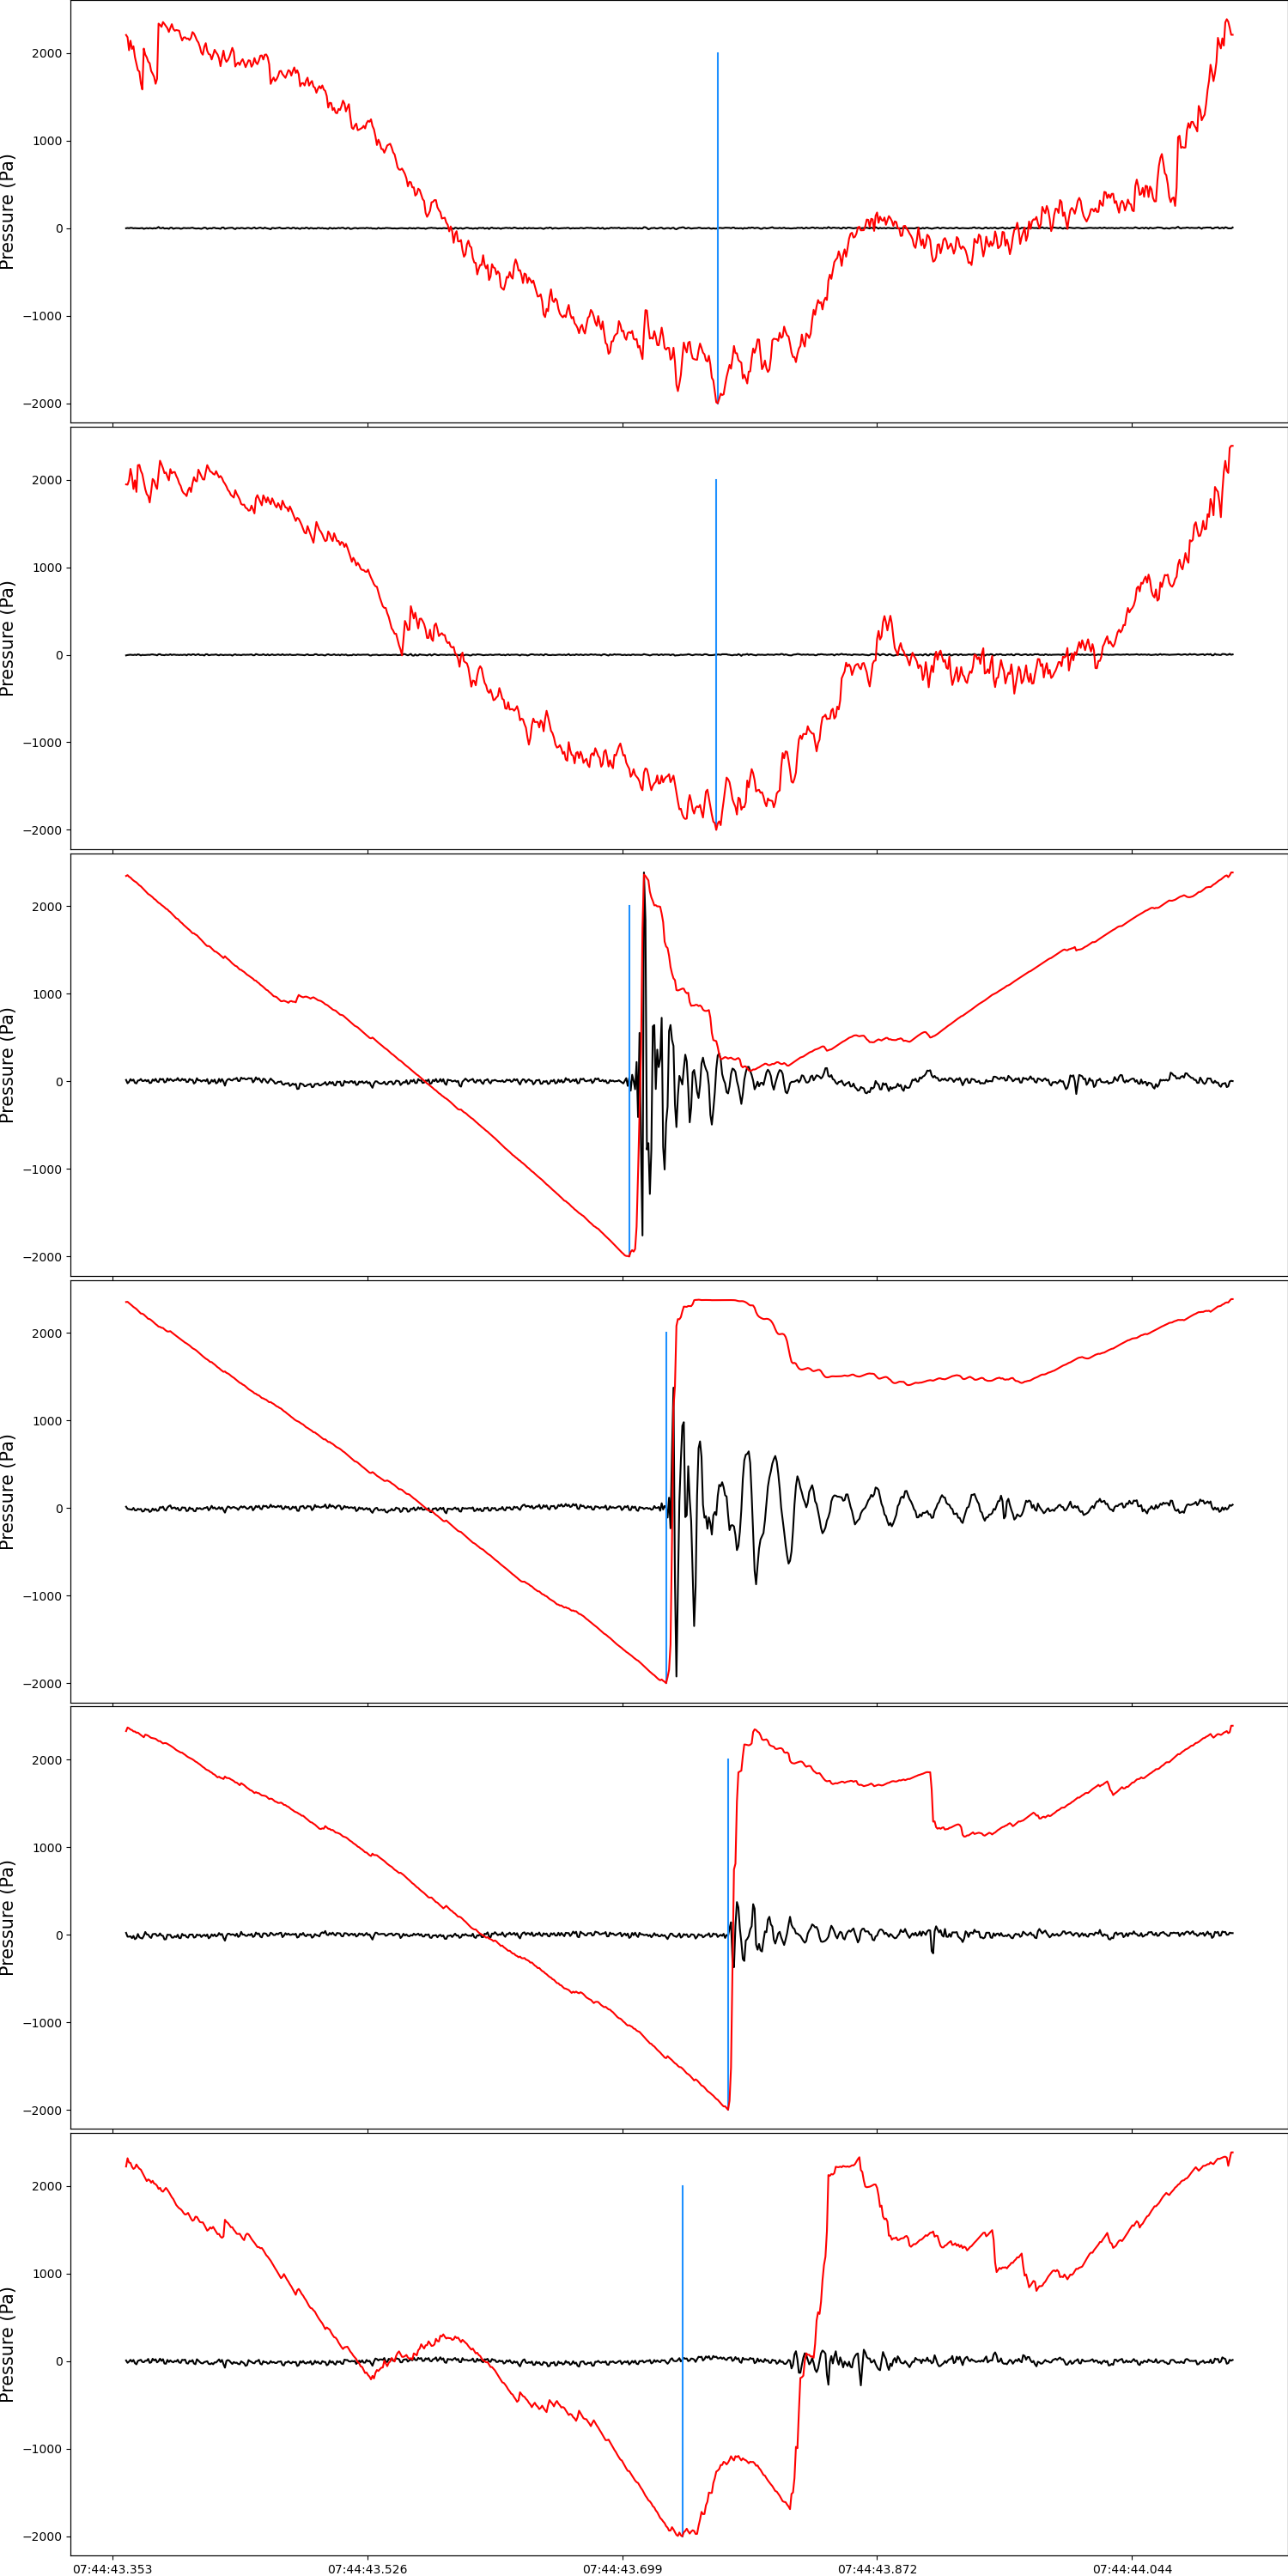

In [22]:
starttime = obspy.UTCDateTime('2019-05-21T07:44:43.613000Z') - 0.25
endtime = starttime + 0.75

event1 = data.copy().trim(starttime=starttime, endtime=endtime)

# aics = [trigger.aic_simple(tr.data) for tr in event1]
aic_t, aics = aic_pick(event1)

# x = event1.plot()
fig, axes = plotting.plot_waveforms(event1, color='black')

for n, ax in enumerate(axes):
    ax2 = ax.twinx()
    t = event1[n].times('matplotlib')
    aic = aics[n]
    ax2.plot(t, aic, color='red')
    ax.plot((aic_t[n], aic_t[n]), (-2000, 2000), color='dodgerblue')
    
t_A = num2date(aic_t[2])
t_B = num2date(aic_t[3])
dt = (t_A - t_B).total_seconds()
v_TAB = 1600
dz_A = 35 + (1/2) * v_TAB * dt
dz_B = 70 - dz_A
print('arrival depth A:', dz_A)
print('estimated depth (meters):', 170 + dz_A)

arrival depth A: 14.2
estimated depth (meters): 184.2


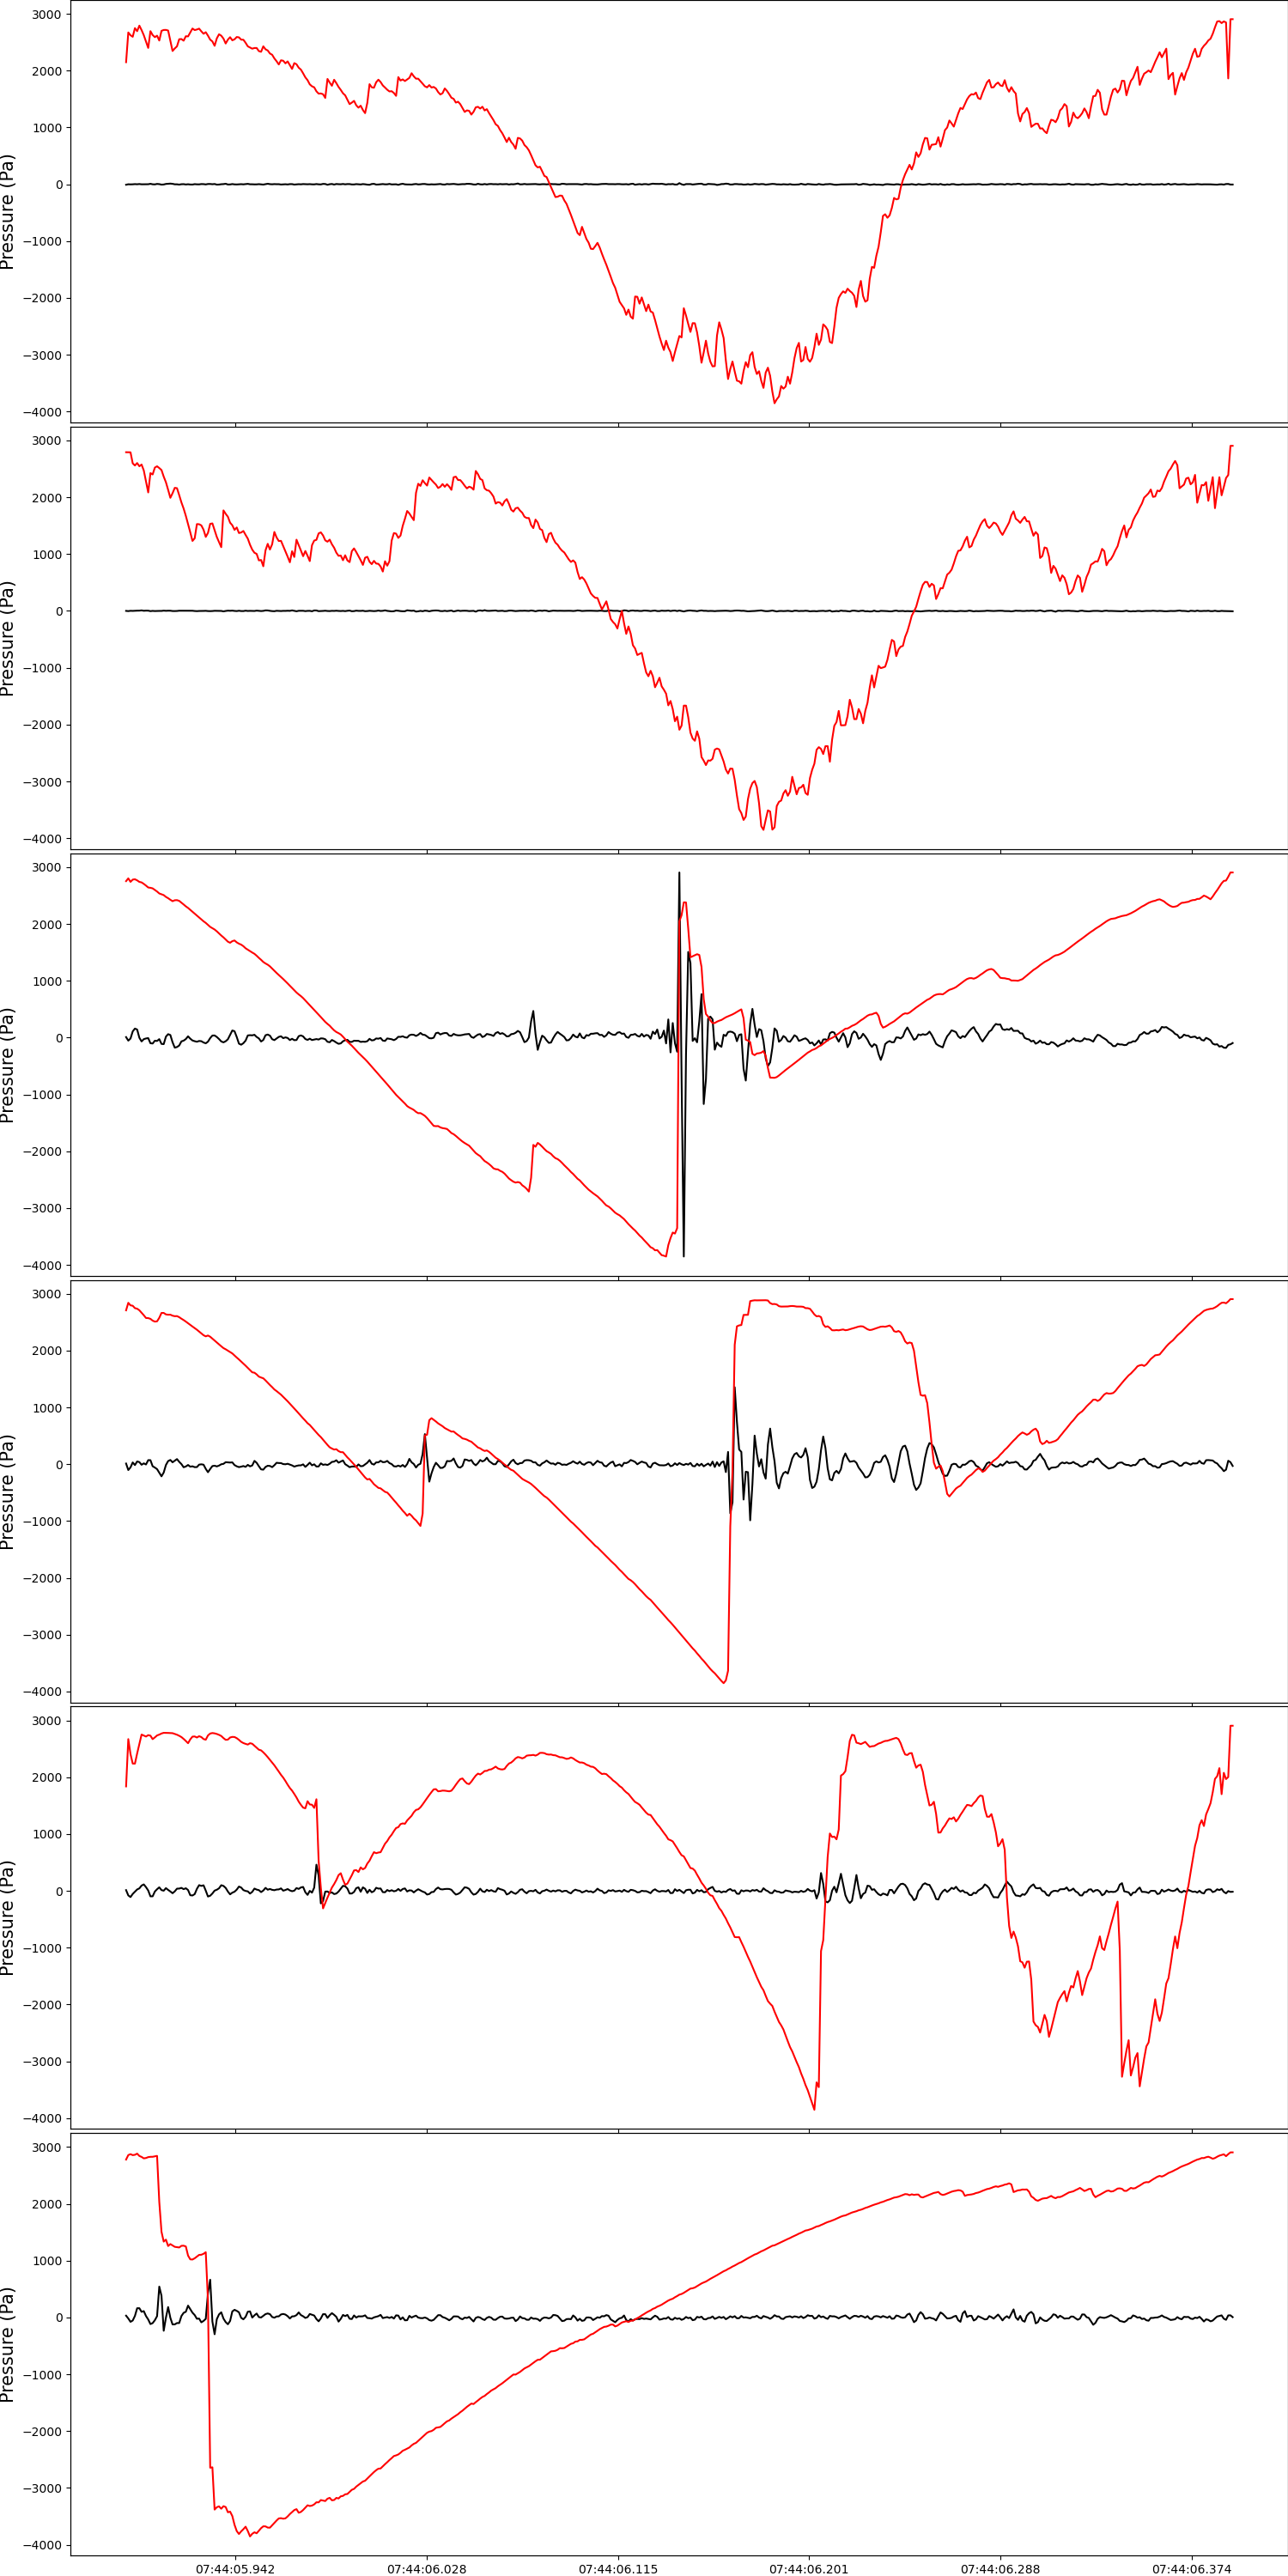

In [23]:
starttime = obspy.UTCDateTime('2019-05-21T07:44:06.043000Z') - 0.15
endtime = starttime + 0.5

event2 = data.copy().trim(starttime=starttime, endtime=endtime)

# aics = [trigger.aic_simple(tr.data) for tr in event1]
aic_t, aics = aic_pick(event2)

# x = event1.plot()
fig, axes = plotting.plot_waveforms(event2, color='black')

for n, ax in enumerate(axes):
    ax2 = ax.twinx()
    t = event2[n].times('matplotlib')
    aic = aics[n]
    ax2.plot(t, aic, color='red')
    # ax.plot((aic_t[n], aic_t[n]), (-2000, 2000), color='dodgerblue')
    # ax2.set_ylim(3000, 6000)
    
t_A = num2date(aic_t[2])
t_B = num2date(aic_t[3])
dt = (t_A - t_B).total_seconds()
v_TAB = 1600
dz_A = 35 + (1/2) * v_TAB * dt
dz_B = 70 - dz_A
print('arrival depth A:', dz_A)
print('estimated depth (meters):', 170 + dz_A)

arrival depth A: 1.3999999999999986
estimated depth (meters): 171.4


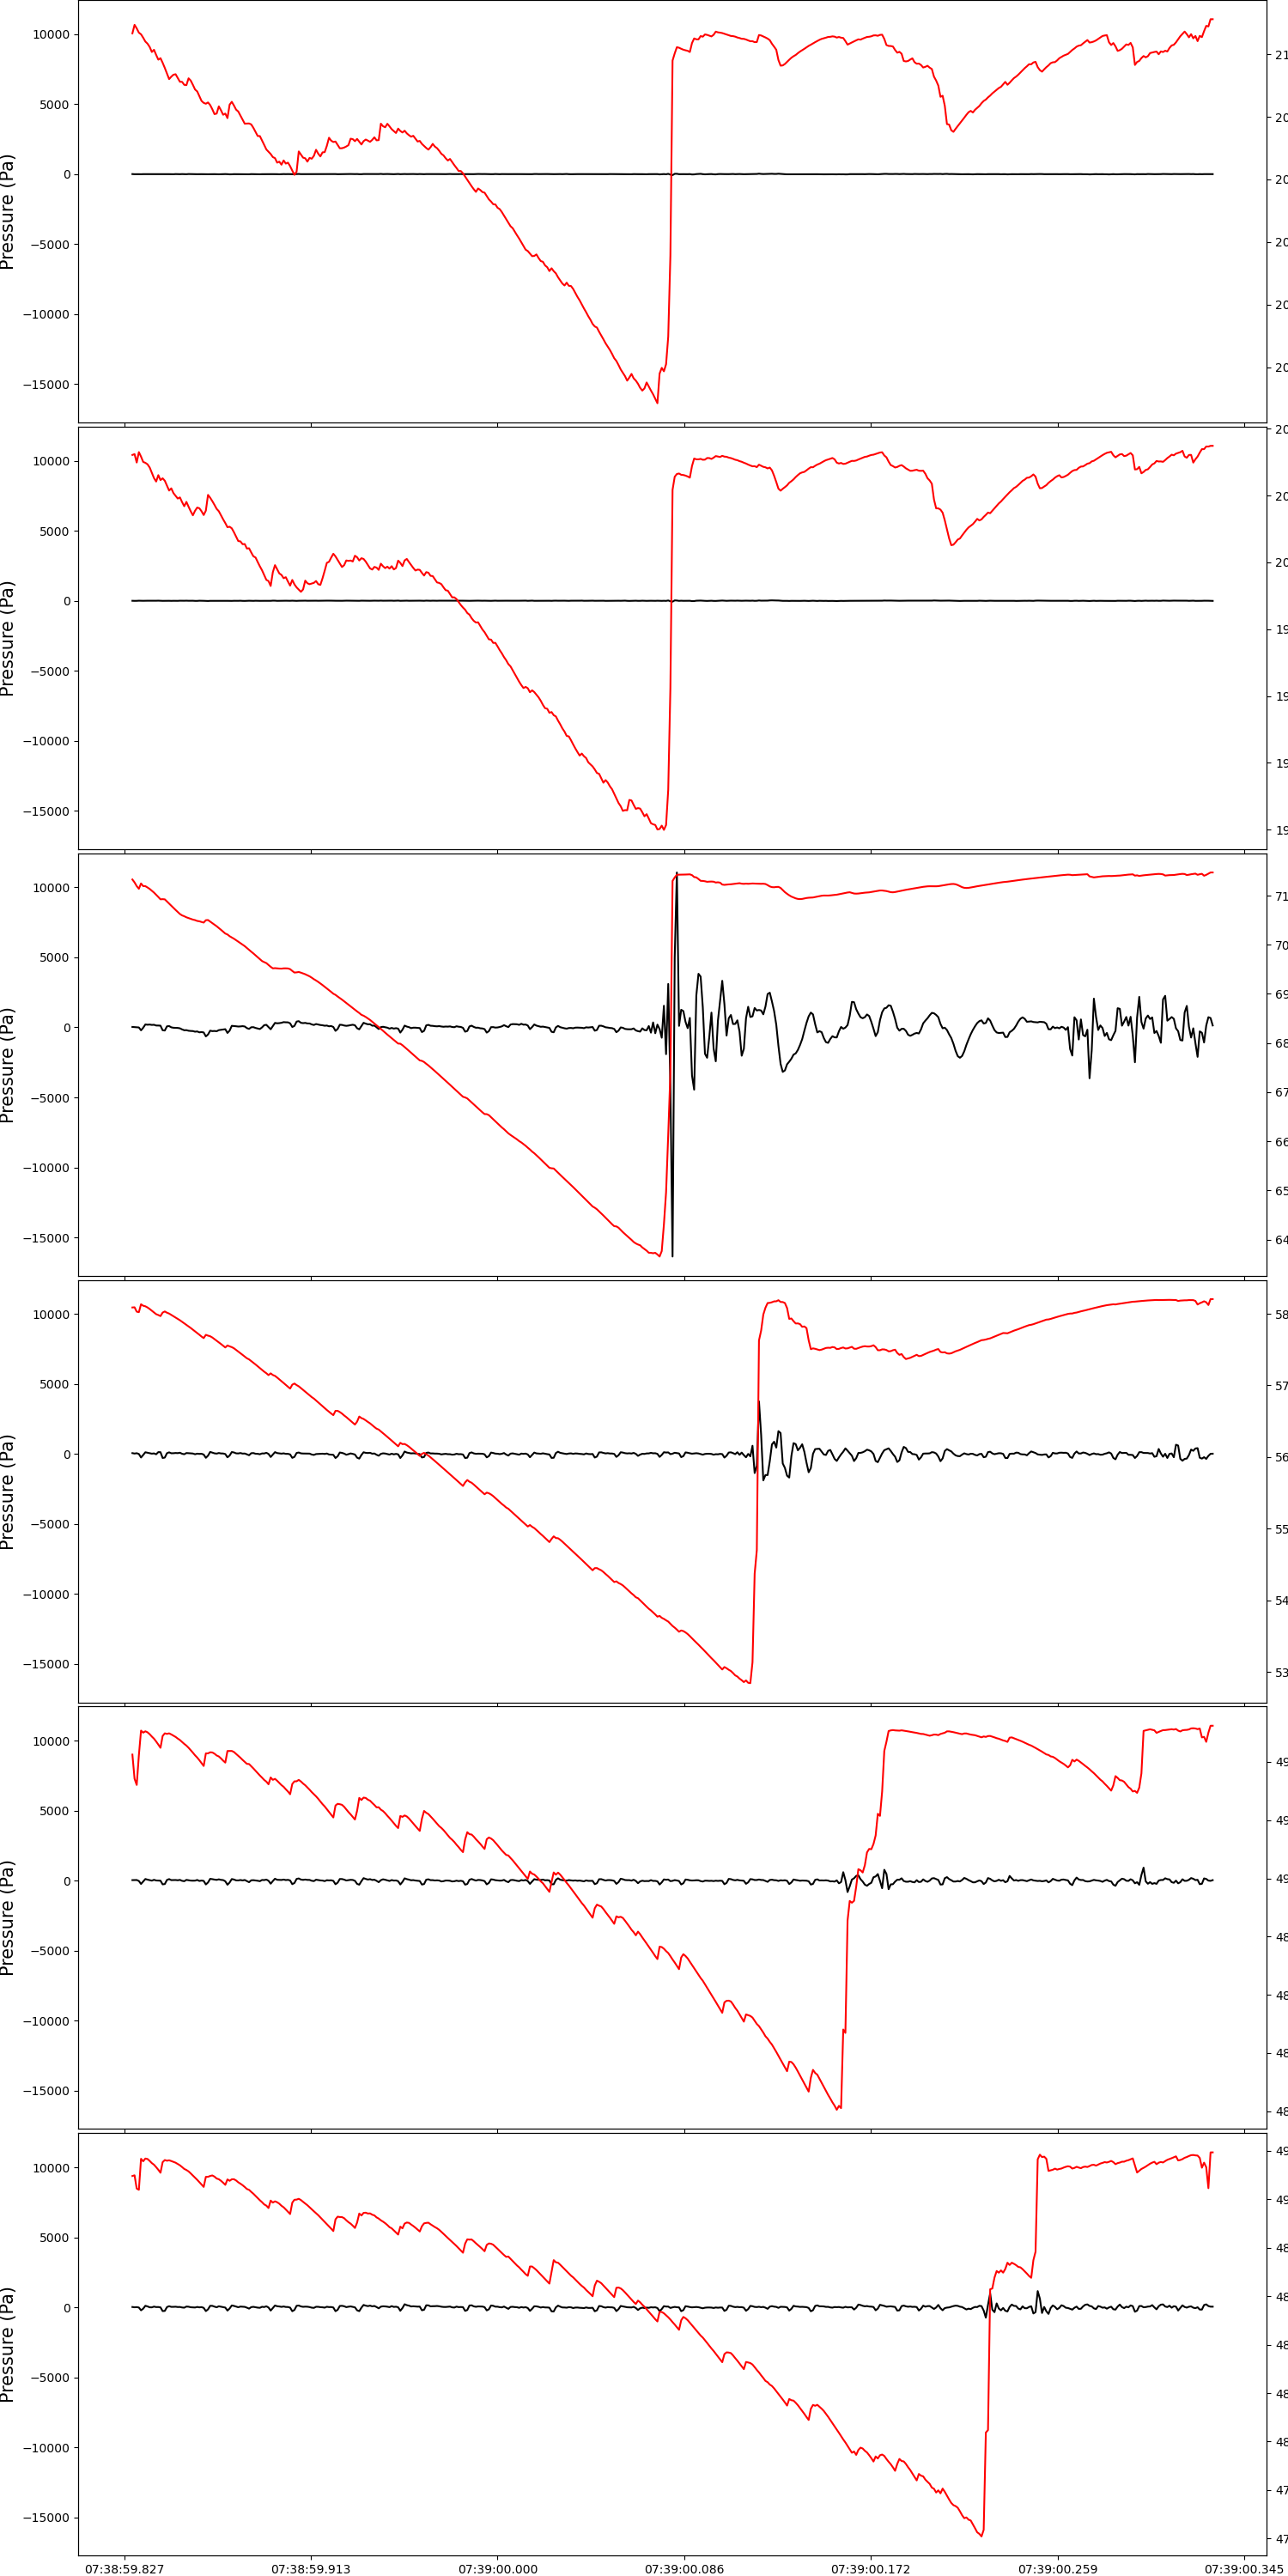

In [24]:
starttime = obspy.UTCDateTime('2019-05-21T07:38:59.981000Z') - 0.15
endtime = starttime + 0.5

event2 = data.copy().trim(starttime=starttime, endtime=endtime)

# aics = [trigger.aic_simple(tr.data) for tr in event1]
aic_t, aics = aic_pick(event2)

# x = event1.plot()
fig, axes = plotting.plot_waveforms(event2, color='black')

for n, ax in enumerate(axes):
    ax2 = ax.twinx()
    t = event2[n].times('matplotlib')
    aic = aics[n]
    ax2.plot(t, aic, color='red')
    # ax.plot((aic_t[n], aic_t[n]), (-2000, 2000), color='dodgerblue')
    # ax2.set_ylim(3000, 6000)
    
t_A = num2date(aic_t[2])
t_B = num2date(aic_t[3])
dt = (t_A - t_B).total_seconds()
v_TAB = 1600
dz_A = 35 + (1/2) * v_TAB * dt
dz_B = 70 - dz_A
print('arrival depth A:', dz_A)
print('estimated depth (meters):', 170 + dz_A)